This notebook shows the use of embeddings, specifically in NLP

In [1]:
# Install the Gensim library if not already installed
!pip install gensim

In [2]:
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
import gensim.downloader
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# We can chose any of these models to download
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

We chose the smallest `glove-twitter-25` which is a GloVe model trained to learn 25-dimensional vector embeddings

In [4]:
# Load pre-trained glove model (this could be a large pre-trained model)
word2vec_model = gensim.downloader.load('glove-twitter-25')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [5]:
# Select a few words for visualization
words_to_visualize = [
    'king', 'queen', 'apple', 'jack', 'ten', 'nine',
    'eight', 'seven', 'six', 'chair', 'lamp', 'desk',
    'orange', 'bannana', 'cherry', 'plum'
  ]

In [6]:
# Extract embeddings for selected words
word_embeddings = np.array([word2vec_model[word] for word in words_to_visualize])

In [7]:
word_embeddings[0] # This is the embedding for 'king'

array([-0.74501 , -0.11992 ,  0.37329 ,  0.36847 , -0.4472  , -0.2288  ,
        0.70118 ,  0.82872 ,  0.39486 , -0.58347 ,  0.41488 ,  0.37074 ,
       -3.6906  , -0.20101 ,  0.11472 , -0.34661 ,  0.36208 ,  0.095679,
       -0.01765 ,  0.68498 , -0.049013,  0.54049 , -0.21005 , -0.65397 ,
        0.64556 ], dtype=float32)

In [8]:
word_embeddings[1] # This is the embedding for 'queen'

array([-1.1266  , -0.52064 ,  0.45565 ,  0.21079 , -0.05081 , -0.65158 ,
        1.1395  ,  0.69897 , -0.20612 , -0.71803 , -0.02811 ,  0.10977 ,
       -3.3089  , -0.49299 , -0.51375 ,  0.10363 , -0.11764 , -0.084972,
        0.02558 ,  0.6859  , -0.29196 ,  0.4594  , -0.39955 , -0.40371 ,
        0.31828 ], dtype=float32)

In [9]:
word_embeddings[2] # This is the embedding for 'apple'

array([ 0.85337  ,  0.011645 , -0.033377 , -0.31981  ,  0.26126  ,
        0.16059  ,  0.010724 , -0.15542  ,  0.75044  ,  0.10688  ,
        1.9249   , -0.45915  , -3.3887   , -1.2152   , -0.054263 ,
       -0.20555  ,  0.54706  ,  0.4371   ,  0.25194  ,  0.0086557,
       -0.56612  , -1.1762   ,  0.010479 , -0.55316  , -0.15816  ],
      dtype=float32)

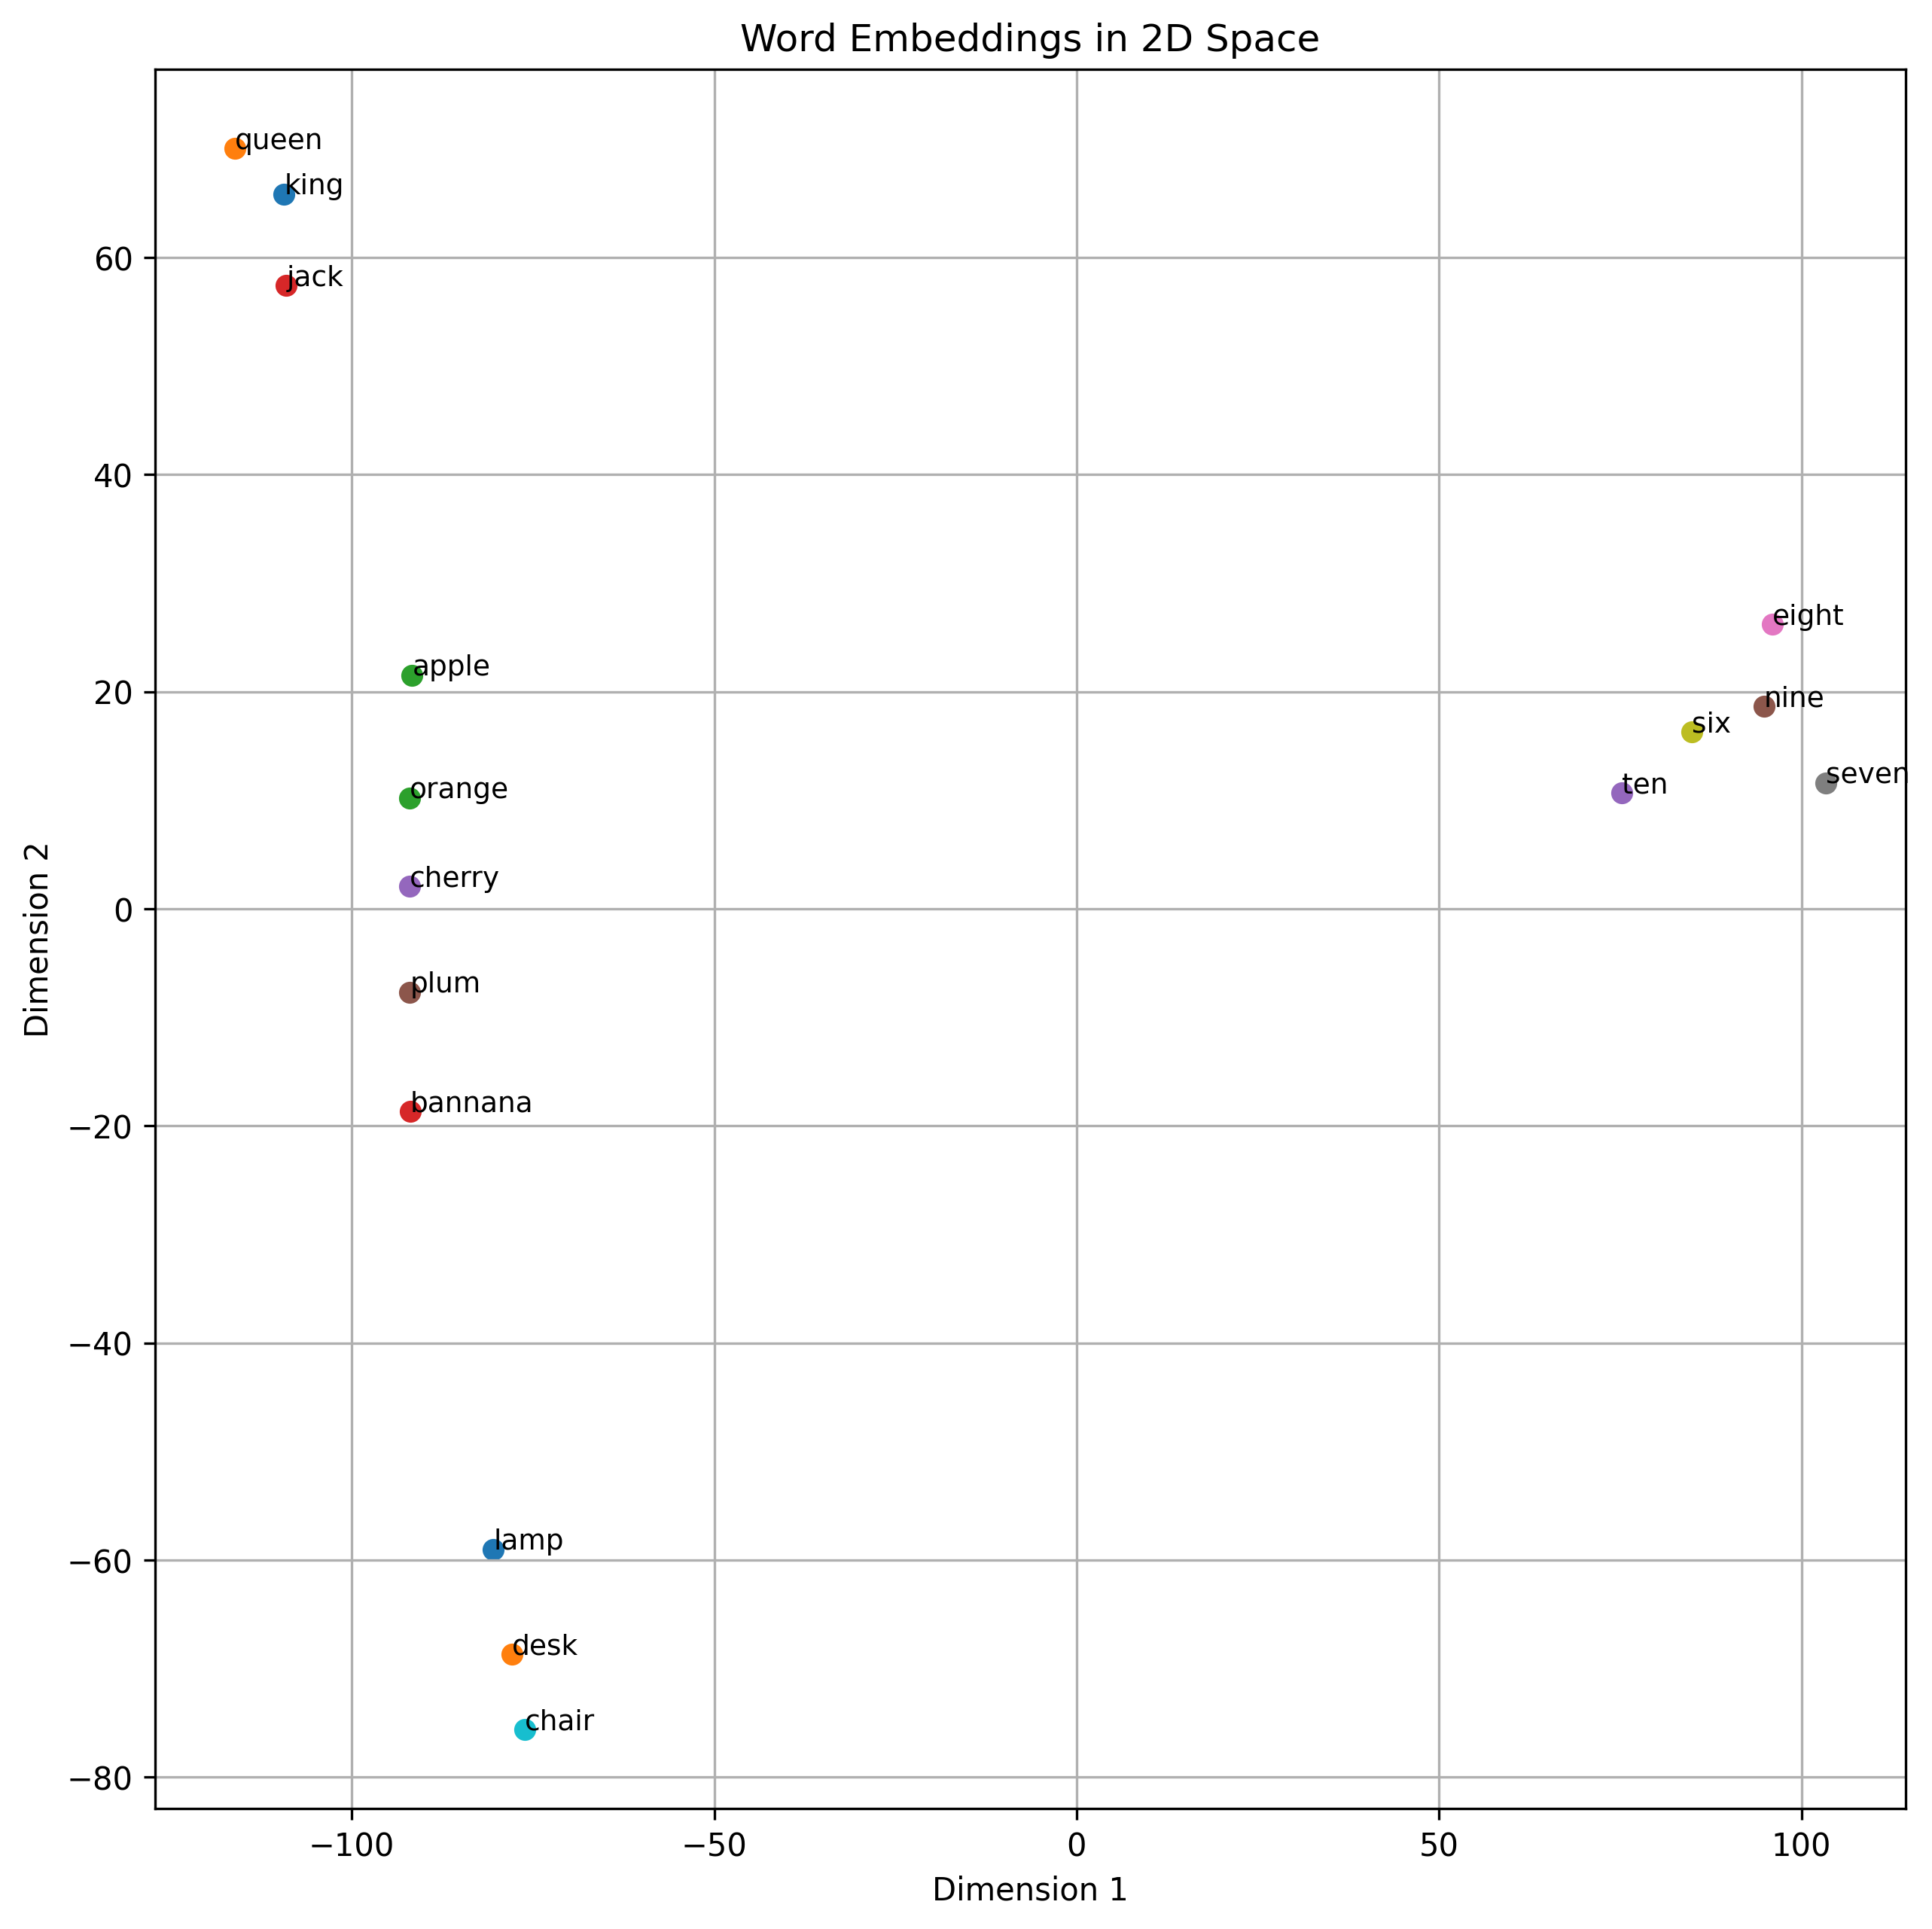

Cosine Similarity (king, queen): 0.920242190361023
Cosine Similarity (king, apple): 0.6321311593055725
Cosine Similarity (queen, apple): 0.5208229422569275


In [11]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (10,10)

# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
embeddings_2d = tsne.fit_transform(word_embeddings)

# Plotting the word embeddings in a 2-dimensional space
for i, word in enumerate(words_to_visualize):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
    plt.text(embeddings_2d[i, 0] + 0.01, embeddings_2d[i, 1] + 0.01, word, fontsize=9)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Embeddings in 2D Space')
plt.grid(True)
plt.show()

# Calculate the cosine similarity between "king" and "queen" compared to "apple"
cosine_similarity_king_queen = word2vec_model.similarity('king', 'queen')
cosine_similarity_king_apple = word2vec_model.similarity('king', 'apple')
cosine_similarity_queen_apple = word2vec_model.similarity('queen', 'apple')

print(f"Cosine Similarity (king, queen): {cosine_similarity_king_queen}")
print(f"Cosine Similarity (king, apple): {cosine_similarity_king_apple}")
print(f"Cosine Similarity (queen, apple): {cosine_similarity_queen_apple}")